In [1]:
import numpy as np
import pandas as pd
import cvxopt 
import cvxpy as cp
import scipy as scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pygsp import graphs

In [2]:
def GDO(delta, k):
    if k == 0:
        return delta
    elif k%2 == 0:
        return np.dot(delta, GDO(delta, k-1))
    elif k%2 == 1:
        return np.dot(np.transpose(delta), GDO(delta, k-1)).tolist()
    
def count_one(x):
    tmp = 0
    for i in range(len(x)):
        for j in range(len(x)):
            
            if x[i][j] == 1:
                tmp +=1
    return tmp

def in_list(x, L):
    
    tmp2 = False
    for y in L:
        tmp1 = True
        
        for i in range(len(x)):
            #avoid repetition 
            tmp1 = (tmp1 and np.abs(x[i]) == np.abs(y[i])) 
            
            
        tmp2 = (tmp2 or tmp1)
    return tmp2
        
                
def inc_to_delta(inc):
    
    n = len(inc)
    print(f"oui{n}")
  
    k = 0
    size = int(count_one(inc)/2)
    tmp = [np.zeros(n) for i in range(size)]
    print(f"size = {size}")

   
    
    for i in range(n):
        for j in range(i):
           
            if inc[i][j] == 1:
                tmp[k][i] = -1
                tmp[k][j] = 1
                k+=1
                
            
    
    return tmp

def get_grid_graph(n_nodes_height=10, n_nodes_width=10) -> graphs.Graph:
    """Return a 2D grid graph."""
    g = graphs.Grid2d(n_nodes_height, n_nodes_width)
    xx, yy = np.meshgrid(np.arange(n_nodes_height), np.arange(n_nodes_width))
    coords = np.array((xx.ravel(), yy.ravel())).T
    g.set_coordinates(coords)
    g.compute_laplacian("combinatorial")
    return g

def loss_function(y,beta):
    J = (cp.pnorm(y - beta, p=2))**2
    S = 0
    C = np.linalg.norm(y-beta,2)
    for i in range (0,len(y)) :
        S += (y[i]-beta[i])**2
    return(S/len(y))


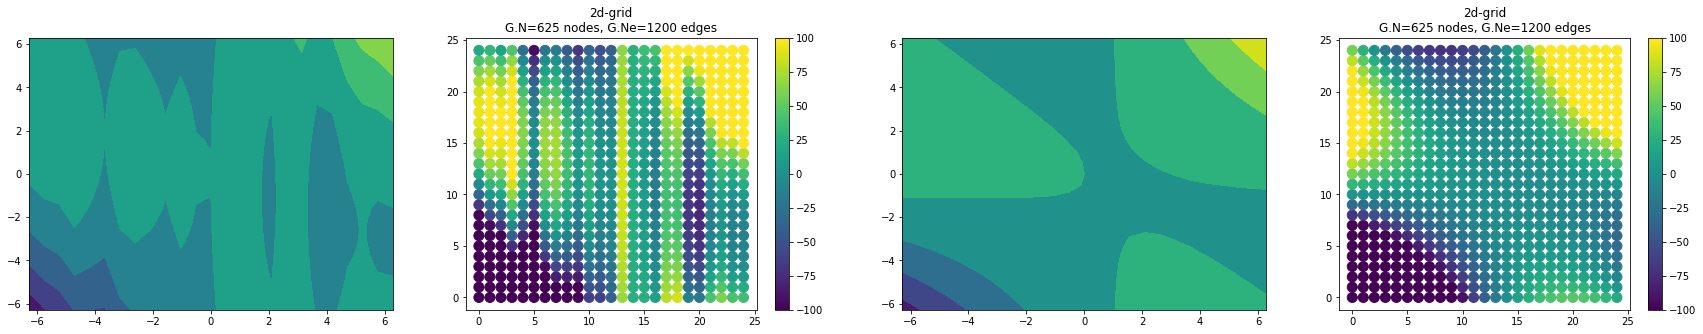

In [135]:
fig, (ax_0, ax_1, ax_2, ax_3) = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
graph_size =25
g =get_grid_graph(graph_size,graph_size)
x = np.linspace(-2 * np.pi, 2 * np.pi, graph_size)
y = np.linspace(-2 * np.pi, 2 * np.pi, graph_size)
xx, yy = np.meshgrid(x, y, sparse=True)
z_orig = xx**2 -yy**2 -xx*yy - 3*xx  +xx*yy**2 +yy*xx**2
z_bruit = z_orig + np.random.normal(size=graph_size, loc = 5, scale = 30)
z_bruit += np.random.normal(size = graph_size, scale = 5)



ax_0.contourf(x, y, z_bruit)
g.plot_signal(z_bruit.flatten(), ax=ax_1, limits = [-100,100])
ax_2.contourf(x, y, z_orig)
g.plot_signal(z_orig.flatten(), ax=ax_3 ,limits = [-100,100])
plt.show()


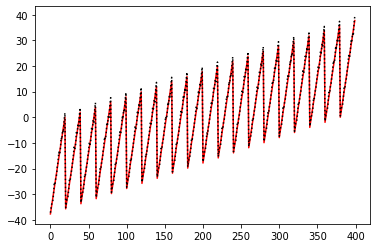

In [37]:
plt.plot(z_orig.flatten(),'r')
plt.plot(z_bruit.flatten(), "k:")

In [136]:


Y = z_bruit.flatten()
n = Y.size


adj_mat = g.W.toarray()

delta1 = inc_to_delta(adj_mat)

D = np.array(GDO(delta1, 1))


vlambda = 50
# Solve l1 trend filtering problem.
X = cp.Variable(shape=(n,))




obj = cp.Minimize(0.5 * cp.norm(Y - X,2)**2 
                  + vlambda * cp.norm(D@X, 1) )
prob = cp.Problem(obj)
# ECOS and SCS solvers fail to converge before
# the iteration limit. Use CVXOPT instead.
prob.solve(solver=cp.CVXOPT, verbose=True)
#print(x.value)
#print(loss_function(z.flatten(),X.value))

oui625
size = 1200
                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jun 04 06:33:50 PM: Your problem has 625 variables, 0 constraints, and 0 parameters.
(CVXPY) Jun 04 06:33:50 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 04 06:33:50 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 04 06:33:50 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 04 06:33:50 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Jun 04 06:33:50 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr ->

406603.11185222527

c:\python38\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


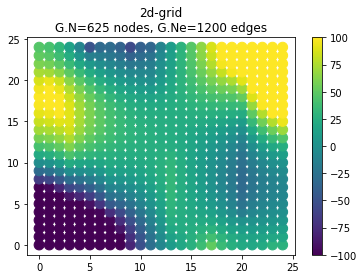

In [137]:

g.plot_signal(X.value,limits = [-100,100])



c:\python38\lib\site-packages\pygsp\plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


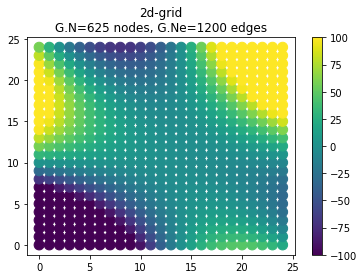

In [138]:
g.plot_signal(z_orig.flatten() ,limits = [-100,100])